# Category Data

## 이산형 데이터를 어떻게 처리할까?
## One-Hot Encoding
- {Green, Blue, Yellow} 데이터 집합에서,
- 실제 dataset의 크기만큼 Binary Feature를 생성
    - {Green} -> [1, 0, 0]
    - {Blue} -> [0, 1, 0]
    - {Yellow} -> [0, 0, 1]

In [1]:
import pandas as pd
import numpy as np

In [2]:
edges = pd.DataFrame({'source' : [0, 1, 2],
                      'target' : [2, 2, 3],
                      'weight' : [3, 4, 5],
                      'color' : ['red', 'blue', 'blue']})

edges

,source,target,weight,color
0,0,2,3,red
1,1,2,4,blue
2,2,3,5,blue


In [3]:
edges.dtypes # 여기서 object타입의 column을 one-hot encoding하는 것

source     int64
target     int64
weight     int64
color     object
dtype: object

In [4]:
# edges["color"] 처럼 Series type으로 더미를 만들어주면 column name이 blue, red가 됨
pd.concat([edges, pd.get_dummies(edges["color"])], axis = 1)

,source,target,weight,color,blue,red
0,0,2,3,red,0,1
1,1,2,4,blue,1,0
2,2,3,5,blue,1,0


In [5]:
pd.get_dummies(edges[["color"]])

,color_blue,color_red
0,0,1
1,1,0
2,1,0


In [6]:
# edges[["color"]] 처럼 DataFrame type으로 더미를 만들어주면 column name이 color_blue, color_red가 됨
pd.merge(edges, pd.get_dummies(edges[["color"]]), left_index = True, right_index = True)

,source,target,weight,color,color_blue,color_red
0,0,2,3,red,0,1
1,1,2,4,blue,1,0
2,2,3,5,blue,1,0


- int type column을 category type으로 mapping해서 더미를 만드는 것도 가능.

In [7]:
weight_dict = {3:'M', 4:'L', 5:'XL'}
edges["weight_dict"] = edges["weight"].map(weight_dict)
edges

,source,target,weight,color,weight_dict
0,0,2,3,red,M
1,1,2,4,blue,L
2,2,3,5,blue,XL


In [8]:
weight_sign = pd.get_dummies(edges[['weight_dict']])
pd.concat([edges, weight_sign], axis = 1)

,source,target,weight,color,weight_dict,weight_dict_L,weight_dict_M,weight_dict_XL
0,0,2,3,red,M,0,1,0
1,1,2,4,blue,L,1,0,0
2,2,3,5,blue,XL,0,0,1


## Data Binning
- 데이터의 구간을 나누는 것
- Data : 0, 4, 12, 16, 16, 18, 24, 26, 28
- Equal width : 데이터의 길이를 정해서 binning
    - Bin 1 : 0, 4 [-, 10)
    - Bin 2 : 12, 16, 16, 18 [10, 20)
    - Bin 3 : 24, 26, 28 [20, +)
- Equal frequency : 데이터를 출현 개수를 동일하게 해서 binning
    - Bin 1 : 0, 4, 12 [-, 14)
    - Bin 2 : 16, 16, 18 [14, 21)
    - Bin 3 : 24, 26, 28 [21, +)
- **어떤 방식으로 binning할 지는 데이터를 보고 내가 판단해야 하는 것.**

In [9]:
# Example from - https://chrisalbon.com/python/pandas_binning_data.html
raw_data = {'regiment' : ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragons', 'Dragons', 'Dragons', 'Dragons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
            'company' : ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd'],
            'name' : ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'],
            'preTestScore' : [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
            'postTestScore' : [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['regiment', 'company', 'name', 'preTestScore', 'postTestScore'])
df

,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Milner,2,62
4,Dragons,1st,Cooze,3,70
5,Dragons,1st,Jacon,4,25
6,Dragons,2nd,Ryaner,24,94
7,Dragons,2nd,Sone,31,57
8,Scouts,1st,Sloan,2,62
9,Scouts,1st,Piger,3,70


- `pd.cut` : 구간을 정하고 구간별로 새 값을 할당해 줄 수 있음

<AxesSubplot:>

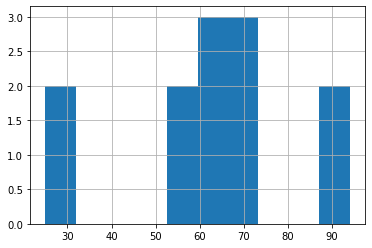

In [10]:
df['postTestScore'].hist()
# 히스토그램을 그려보고 구간을 어떻게 정할지 보면 됨

In [11]:
bins = [0, 50, 80, 100] # defines bins as 0 to 50, 50 to 80, 80 to 100
group_names = ['Low', 'Good', 'Great']
df['categories'] = pd.cut(df['postTestScore'], bins, labels = group_names)
df

,regiment,company,name,preTestScore,postTestScore,categories
0,Nighthawks,1st,Miller,4,25,Low
1,Nighthawks,1st,Jacobson,24,94,Great
2,Nighthawks,2nd,Ali,31,57,Good
3,Nighthawks,2nd,Milner,2,62,Good
4,Dragons,1st,Cooze,3,70,Good
5,Dragons,1st,Jacon,4,25,Low
6,Dragons,2nd,Ryaner,24,94,Great
7,Dragons,2nd,Sone,31,57,Good
8,Scouts,1st,Sloan,2,62,Good
9,Scouts,1st,Piger,3,70,Good


In [12]:
pd.get_dummies(df).head()

,preTestScore,postTestScore,regiment_Dragons,regiment_Nighthawks,regiment_Scouts,company_1st,company_2nd,name_Ali,name_Cooze,name_Jacobson,...,name_Miller,name_Milner,name_Piger,name_Riani,name_Ryaner,name_Sloan,name_Sone,categories_Low,categories_Good,categories_Great
0,4,25,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,24,94,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,31,57,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2,62,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,3,70,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


## Label encoding by `sklearn`
- `sklearn`의 preprocessing 패키지도 label / one-hot encoding 지원

- fit과 transform의 과정이 나눠진 이유
    - 새로운 데이터 입력 시, 기존 labelling 규칙을 그대로 적용할 필요가 있음.
    - fit은 규칙을 생성하는 과정
    - transform은 규칙을 적용하는 과정
    - fit을 통해 규칙이 생성된 labelencoder는 따로 저장하여 새로운 데이터를 입력할 경우 사용.
    - encoder들을 실제 시스템에 사용할 경우 pickle화 필요

In [13]:
raw_example = df.values
data = raw_example.copy()
data[:3]

array([['Nighthawks', '1st', 'Miller', 4, 25, 'Low'],
       ['Nighthawks', '1st', 'Jacobson', 24, 94, 'Great'],
       ['Nighthawks', '2nd', 'Ali', 31, 57, 'Good']], dtype=object)

- LabelEncoder()

In [17]:
from sklearn import preprocessing
# LabelEncoder() 객체 생성
le = preprocessing.LabelEncoder()

In [18]:
data[:, 0]

array(['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragons',
       'Dragons', 'Dragons', 'Dragons', 'Scouts', 'Scouts', 'Scouts',
       'Scouts'], dtype=object)

In [19]:
# le 객체에 fitting
le.fit(data[:,0])

LabelEncoder()

In [20]:
le.classes_

array(['Dragons', 'Nighthawks', 'Scouts'], dtype=object)

In [21]:
# fitting 한 정보대로 transform
data[:,0] = le.transform(raw_example[:,0])
data[:3]

array([[1, '1st', 'Miller', 4, 25, 'Low'],
       [1, '1st', 'Jacobson', 24, 94, 'Great'],
       [1, '2nd', 'Ali', 31, 57, 'Good']], dtype=object)

- 여러 column에 대한 LabelEncoder()를 만들고 이를 list에 저장

In [22]:
label_column = [0, 1, 2, 5]
label_encoder_list = []
for column_index in label_column:
    le = preprocessing.LabelEncoder()
    le.fit(raw_example[:, column_index])
    data[:, column_index] = le.transform(raw_example[:, column_index])
    label_encoder_list.append(le) # 각 column에 대한 le 객체를 만들어서 list에 저장 
    del le # le 객체를 만들 때마다 초기화
data[:3]

array([[1, 0, 4, 4, 25, 2],
       [1, 0, 2, 24, 94, 1],
       [1, 1, 0, 31, 57, 0]], dtype=object)

In [26]:
print(label_encoder_list[0].classes_)
print(label_encoder_list[1].classes_)

['Dragons' 'Nighthawks' 'Scouts']
['1st' '2nd']


- OneHotEncoder()

In [35]:
one_hot_enc = preprocessing.OneHotEncoder()
one_hot_enc.fit(data[:, 0].reshape(-1, 1))

data[:, 0].reshape(-1, 1)

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [2],
       [2],
       [2],
       [2]], dtype=object)

In [33]:
one_hot_enc.categories_

[array([0, 1, 2], dtype=object)]

In [36]:
onehotlabels = one_hot_enc.transform(data[:, 0].reshape(-1, 1)).toarray()
onehotlabels

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

## Titanic 데이터셋으로 one-hot encoding

In [66]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white") # white background style for seaborn plots
sns.set(style="whitegrid", color_codes = True)

In [41]:
DATA_DIR = './titanic'
data_files = reversed([os.path.join(DATA_DIR, filename) for filename in os.listdir(DATA_DIR)])
df_list = []
for filename in data_files:
    df_list.append(pd.read_csv(filename))

df = pd.concat(df_list, sort=False) 
df = df.reset_index(drop=True) 

number_of_train_dataset = df.Survived.notnull().sum() 
number_of_test_dataset = df.Survived.isnull().sum() 
y_true = df.pop("Survived")[:number_of_train_dataset] 
df.tail() 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


- 데이터 타입을 정리해두는 것이 좋음
    - 정리된 타입으로 변경한 후 데이터 노트에 기록하는 습관을 들이면 좋음

In [42]:
object_columns = ["PassengerId", "Pclass", "Name", "Sex", "Ticket", "Cabin", "Embarked"]
numeric_columns = ["Age", "SibSp", "Parch", "Fare"]

In [44]:
# 데이터 타입 변경
for col_name in object_columns:
    df[col_name] = df[col_name].astype(object)

for col_name in numeric_columns:
    df[col_name] = df[col_name].astype(float)
    
df["Parch"] = df["Parch"].astype(int)
df["SibSp"] = df["SibSp"].astype(int)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   object 
 1   Pclass       1309 non-null   object 
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int32  
 6   Parch        1309 non-null   int32  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int32(2), object(7)
memory usage: 102.4+ KB


In [48]:
df["Embarked"].value_counts() # Embarked column의 최빈값(mode)가 S임.
# df["Embarked"].mode()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [49]:
# 그래서 빈 칸은 S로 채워줌
df.loc[61, "Embarked"] = "S"
df.loc[829, "Embarked"] = "S"

In [50]:
# df 2개를 inner로 merge해주는 함수
def merge_and_get(ldf, rdf, on, how="inner", index = None):
    if index is True:
        return pd.merge(ldf, rdf, how = how, left_index = True, right_index = True)
    else:
        return pd.merge(ldf, rdf, how = how, on = on)

In [53]:
# merge_and_get 함수를 이용해 one-hot encoding 
one_hot_df = merge_and_get(df, pd.get_dummies(df["Sex"], prefix = "Sex"), on = None, index = True) # sex_modified
one_hot_df = merge_and_get(one_hot_df, pd.get_dummies(df["Pclass"], prefix = "Pclass"), on = None, index = True)
one_hot_df = merge_and_get(one_hot_df, pd.get_dummies(df["Embarked"], prefix = "Embarked"), on = None, index = True)
one_hot_df.head(2)

c:\Miniconda3\envs\da\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,1,0,0


- one-hot encoding한 column들에 대해 시각화

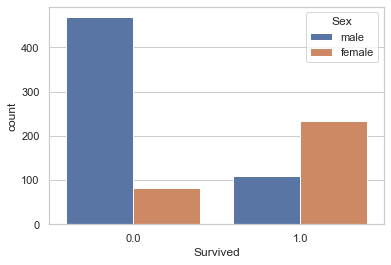

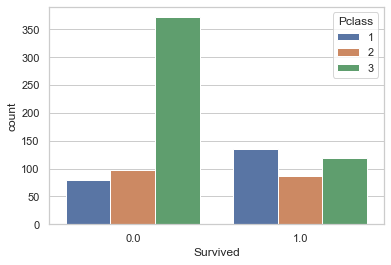

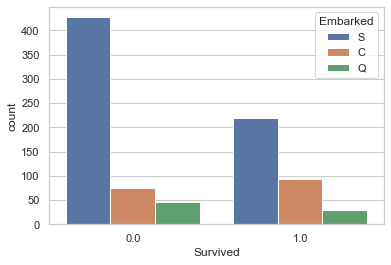

In [67]:
temp_columns = ["Sex", "Pclass", "Embarked"]

for col_name in temp_columns:
    temp_df = pd.merge(one_hot_df[col_name], y_true, left_index = True, right_index = True)
    sns.countplot(x = 'Survived', hue = col_name, data = temp_df)
    plt.show()

- 시각화를 했을 때 생각해 볼 점
    - 남자일수록 많이 죽었다
    - 낮은 등급의 class에 있는 사람일수록 많이 죽었다
    - S에서 탄 사람이 조금 더 많이 죽었음 (이건 C, Q에 비해 죽은 사람의 비율이 크게 차이남)
        - 이런 것들은 데이터 노트에 적어두면 좋음

* 시각화를 할 때 temp_df를 만들어 관리하면 편함

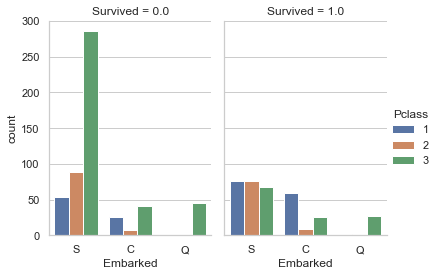

In [70]:
temp_df = pd.merge(
    one_hot_df[temp_columns], y_true, left_index = True, right_index = True)
g = sns.catplot(x = "Embarked", hue = "Pclass", col = "Survived",
                data = temp_df, kind = "count",
                height = 4, aspect = .7)